# Day 08. Exercise 04
# Regression

## 0. Imports

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from io import StringIO

## 1. Preprocessing

1. Read the file [`checker_regression.csv`](https://drive.google.com/file/d/1L8auBzJEghWFewznhhFpcrqxW4GqcfRY/view?usp=sharing).
2. Fill the missing values in it with `0`.
3. Make a split of your dataset on train and test with parameters `test_size=0.2`.

In [2]:
df = pd.read_csv('../data/checker_regression.csv')

In [3]:
df.fillna(0, inplace=True)

In [4]:
# Удаление столбца 'uid', так как он не нужен для модели
df = df.drop('uid', axis=1)

# Разделение датасета
X = df.drop('AVG(diff)', axis=1)  
y = df['AVG(diff)']

# Определение категориальных и числовых признаков
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Преобразование категориальных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Разделение датасета
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Применение преобразования
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

## 2. Crossvalidation

1. Write a function `crossval` that takes as arguments: `n_splits` for `KFold()`, `X`, `y`, model instantiated class with the parameters of the model (keep in mind: `random_state=21`) and returns for a given model class a result like this:

```
train -  2696.4496895424836   |   test -  1589.9979527104958
train -  2660.957874001452   |   test -  2075.102636027137
train -  2847.315529246795   |   test -  320.911928168403
train -  2500.7691099659237   |   test -  4132.461382030178
train -  2643.927917295123   |   test -  2237.8140952197878
train -  2396.295678819444   |   test -  4509.650064742476
train -  2003.402267924976   |   test -  8403.491474908551
train -  2531.876094212613   |   test -  3135.944102735099
train -  2683.1795186023123   |   test -  1796.01426292594
train -  2537.1192483996338   |   test -  3439.29824116941
Average RMSE on crossval is 3164.0686140637476
```

2. Run the function for `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. You may choose the parameters by yourself, but find the good enough for you.

In [5]:
def crossval(n_splits, X, y, model):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=21)
    train_errors = []
    test_errors = []

    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

        train_errors.append(train_rmse)
        test_errors.append(test_rmse)

        print(f'train - {train_rmse}   |   test - {test_rmse}')

    avg_rmse = np.mean(test_errors)
    print(f'Average RMSE on crossval is {avg_rmse}')

    return train_errors, test_errors, avg_rmse

## 3. Predictions and evaluation

1. Make predictions for the test dataset using each of the three models with the finalized parameters.
2. Draw a plot for each of the models where the `x-axis` is the actual average difference and the `y-axis` is the prediction made by a model.
3. How would plot look like in the ideal case? Put the answer to the markdown cell in the end of the section.

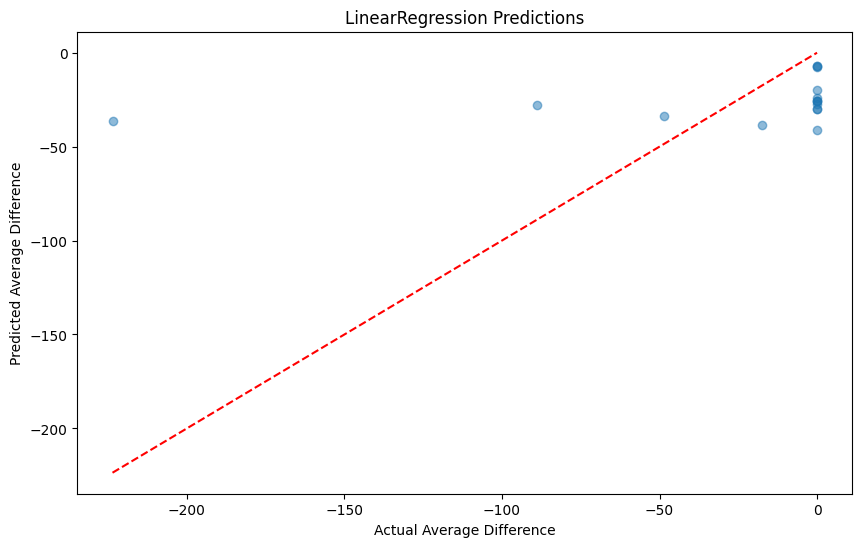

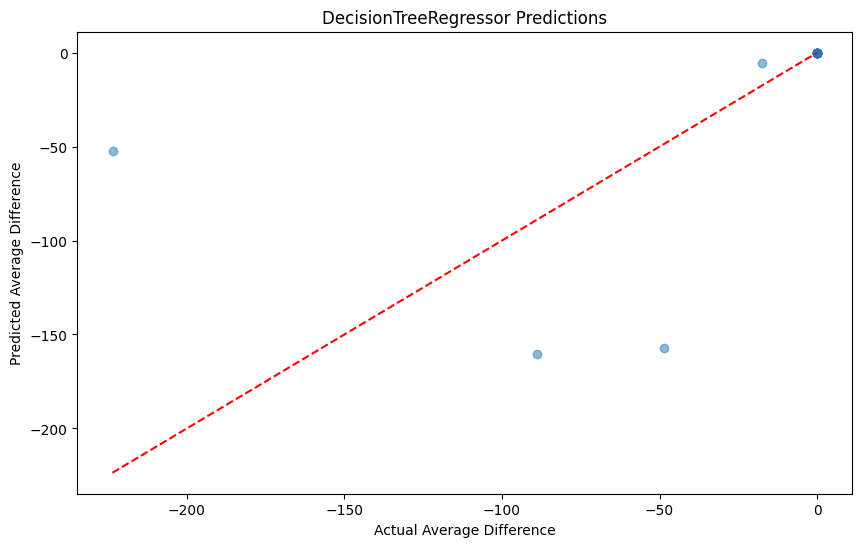

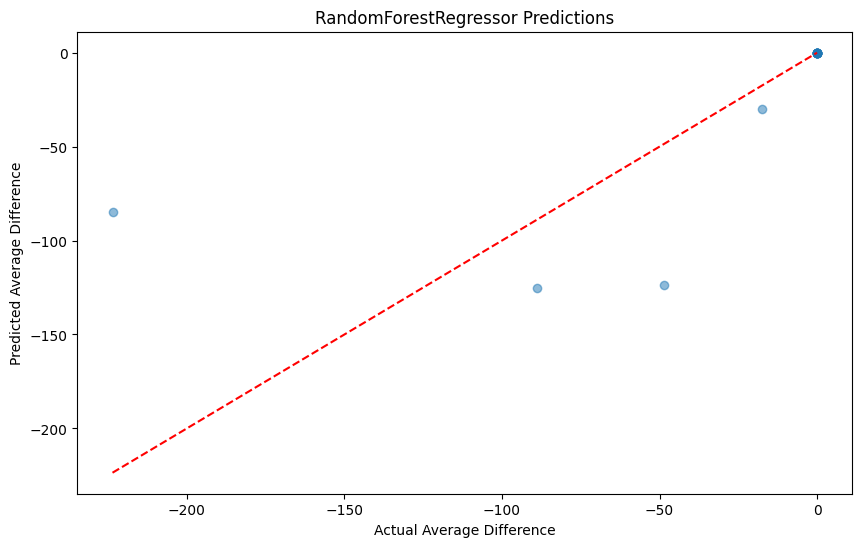

In [6]:
# Обучение моделей
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=21),
    'RandomForestRegressor': RandomForestRegressor(random_state=21)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Average Difference')
    plt.ylabel('Predicted Average Difference')
    plt.title(f'{name} Predictions')
    plt.show()

В идеальном случае график будет выглядеть как прямая линия, где все точки лежат на линии `y=x`. Это будет значить, что все прогнозы модели идеально совпадают с фактическими значениями.

In [9]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 77 entries, 0 to 76
Series name: AVG(diff)
Non-Null Count  Dtype  
--------------  -----  
77 non-null     float64
dtypes: float64(1)
memory usage: 744.0 bytes
